## **Fashion Visual Search & Intelligent Styling Assistant**

The global fashion e-commerce market faces a critical challenge: 65% of potential customers abandon their shopping journey because they cannot find the specific items they're looking for. Traditional text-based search fails to capture the nuanced visual elements that drive fashion purchases - color shades, patterns, textures, and styling details that are difficult to describe in words.

### Problem Statement
* Retrieve visually similar products from inventory

* Recommend outfits that go well with the item

* Provide personalized suggestions based on user behavior


#### Import Necessery Library

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import zipfile
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#### **Data Collection**

In [2]:
datad = pd.read_csv('.\dresses_bd_processed_data.csv')
dataj =pd.read_csv('.\jeans_bd_processed_data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\j'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\j'
C:\Users\satya\AppData\Local\Temp\ipykernel_21364\1288243552.py:1: SyntaxWarning: invalid escape sequence '\d'
  datad = pd.read_csv('.\dresses_bd_processed_data.csv')
C:\Users\satya\AppData\Local\Temp\ipykernel_21364\1288243552.py:2: SyntaxWarning: invalid escape sequence '\j'
  dataj =pd.read_csv('.\jeans_bd_processed_data.csv')


#### **Combine both datasets into a single master catalog:**

In [3]:
data = pd.concat([datad, dataj], ignore_index=True)

In [4]:
data

,selling_price,discount,category_id,meta_info,product_id,pdp_url,sku,brand,department_id,last_seen_date,launch_on,mrp,product_name,feature_image_s3,channel_id,feature_list,description,style_attributes,pdp_images_s3
0,{'INR': 474848.9539},0.0,30,Slim fit. Designed to hit at the ankle. UK siz...,b613d7b5dfe86f3e695d931d31fd729fdf44e181f14079...,https://www.ralphlauren.co.uk/en/kristian-silk...,479495,RALPH LAUREN,2,2025-05-01,2020-02-29,{'INR': 474848.9539},Kristian Silk Tuxedo Dress,https://gallery.stylumia.com/originals/2020/02...,14,"['Slim fit. Designed to hit at the ankle.', 'U...",The Kristian evening dress is informed by the ...,{},['https://gallery.stylumia.com/originals/2020/...
1,{'INR': 464648.6919},0.0,30,Slim fit. Designed to hit at the ankle. UK siz...,482b10a23f8d00cfc7c9bbeeac4e26d25dd303d8e62e97...,https://www.ralphlauren.co.uk/en/kristian-silk...,502670,RALPH LAUREN,2,2025-05-08,2020-02-29,{'INR': 464648.6919},Kristian Silk Tuxedo Dress,https://gallery.stylumia.com/originals/2020/02...,14,"['Slim fit. Designed to hit at the ankle.', 'U...",The Kristian evening dress is informed by the ...,{},['https://gallery.stylumia.com/originals/2020/...
2,{'INR': 29496.0812},0.0,30,Fit-and-flare silhouette. Intended to hit at t...,3508b052ef7a5eea820423b97713612bc92a3f2301a3d3...,https://www.ralphlauren.co.uk/en/fit-and-flare...,478766,RALPH LAUREN,2,2025-05-08,2020-02-29,{'INR': 29496.0812},Fit-and-Flare Shirtdress,https://gallery.stylumia.com/originals/2020/02...,14,['Fit-and-flare silhouette. Intended to hit at...,Airy georgette and a flattering fit-and-flare ...,{},['https://gallery.stylumia.com/originals/2020/...
3,{'INR': 17156.9392},0.0,30,"Fits true to size; take your normal size, Stra...",6360245240b68885bd4dbcef8d8856c0fb13f1314769f5...,https://www.anthropologie.com/shop/adena-crepe...,50297209_041,BHLDN,2,2025-01-31,2020-05-27,{'INR': 17156.9392},Adena Crepe Dress,https://gallery.stylumia.com/originals/2020/05...,48,"['Back zip', 'Polyester; polyester lining', 'P...","A sleek square neckline tops this stretchy, bo...","{'modelNotes': '', 'dimensions': 'Fits true to...",['https://gallery.stylumia.com/originals/2020/...
4,{'INR': 26079.5467},0.0,30,Fit-and-flare silhouette Designed to hit at th...,5d07037957e64d1e218499cb7d7a8e5e57aa59249bb806...,https://www.ralphlauren.co.uk/en/belted-cotton...,478750,RALPH LAUREN,2,2025-05-08,2021-02-12,{'INR': 26079.5467},Belted Cotton-Blend Shirtdress,https://gallery.stylumia.com/originals/2021/02...,14,['Fit-and-flare silhouette Designed to hit at ...,This iteration of Lauren's iconic shirtdress i...,{},['https://gallery.stylumia.com/originals/2021/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17478,{'USD': 420.0},0.0,56,"Main material: 100% cotton, Secondary material...",f9fbee3a68a110f65c2dcaa01d00ed3fc787d3b367c519...,https://us.sandro-paris.com/en/p/wide-leg-stri...,d15edac77f1eadddd847303ce2ce10cf,Sandro Paris,2,2025-05-09,2025-04-30,{'USD': 420.0},Wide-leg striped jeans,https://gallery.stylumia.com/originals/2025/04...,383,[],SANDRO pays tribute to the artistic world of L...,"{'Composition': 'Main material: 100% cotton, S...",['https://gallery.stylumia.com/originals/2025/...
17479,{'USD': 92.8447},0.0,56,Exterior: 100% cotton Composition MACHINE WASH...,a99c8e83ff86ce01228b54b0c8640d99adfca0a7755550...,https://www.massimodutti.com/gb/midrise-straig...,48640767/407,Massimo Dutti,2,2025-05-02,2025-04-30,{'USD': 92.8447},Mid-rise straight-leg jeans,https://gallery.stylumia.com/originals/2025/04...,7,['Straight-leg Jeans: straight silhouette from...,NaN,"{'Composition': 'Exterior: 100% cotton', 'care...",['https://gallery.stylumia.com/originals/2025/...
17480,{'USD': 79.7574},0.0,56,"Exterior: 50% cotton, Exterior: 50% lyocell Co...",fcf79b834d61cd5ce9430a807ef218a2b9a8b5a906f309...,https://www.massimodutti.com/gb/highwaist-wide...,49228723/800,Massimo Dutti,2,2025-05-09,2025-04-30,{'USD': 79.7574},High-waist wide-leg jeans with seam det

## **Domain Analysis**

* **selling_price:** The current selling price of the product, usually in INR (Indian Rupees), stored as a dictionary with the currency key.
* **discount:** The discount percentage applied on the product’s MRP (Maximum Retail Price).
* **category_id:** Numeric identifier for the product category (e.g., dresses).
* **meta_info:** Short descriptive text about the product’s fit, style, size guide, or other key selling points.
* **product_id:** A unique hash-based identifier for each product.
* **pdp_url:** URL to the product detail page on the retailer’s website.
* **sku:** Stock Keeping Unit, a unique product code used for inventory management.
* **brand:** Brand name of the product.
* **department_id:** Numeric code indicating the broader department the product belongs to (e.g., women’s apparel).
* **last_seen_date:** The most recent date when the product was observed or crawled on the retailer’s site.
* **launch_on:** The date when the product was first launched or added to the inventory.
* **mrp:** The Maximum Retail Price of the product, stored as a dictionary with currency information.
* **product_name:** The commercial name/title of the product.
* **feature_image_s3:** URL link to the main product image hosted on the Stylumia image storage.(use this url if you want to download images )
* **channel_id:** Numeric ID representing the retailer.
* **feature_list:** List of key features and design attributes of the product.
* **description:** Detailed textual description of the product, including style, usage, and other marketing information.
* **style_attributes:** A JSON/dictionary containing additional style metadata.
* **pdp_images_s3:** List of URLs for additional product images stored on the Stylumia image repository. (use this url if you want to download images )


#### **Load and Inspect the Data**

In [5]:
# Check the image column (use one image per product)
data['image_url'] = data['feature_image_s3']  # Or choose the first URL from pdp_images_s3 if it’s a list
data = data.dropna(subset=['image_url'])  # Remove rows without images

## **Basic Data Exploration**

In [6]:
data.head()

,selling_price,discount,category_id,meta_info,product_id,pdp_url,sku,brand,department_id,last_seen_date,launch_on,mrp,product_name,feature_image_s3,channel_id,feature_list,description,style_attributes,pdp_images_s3,image_url
0,{'INR': 474848.9539},0.0,30,Slim fit. Designed to hit at the ankle. UK siz...,b613d7b5dfe86f3e695d931d31fd729fdf44e181f14079...,https://www.ralphlauren.co.uk/en/kristian-silk...,479495,RALPH LAUREN,2,2025-05-01,2020-02-29,{'INR': 474848.9539},Kristian Silk Tuxedo Dress,https://gallery.stylumia.com/originals/2020/02...,14,"['Slim fit. Designed to hit at the ankle.', 'U...",The Kristian evening dress is informed by the ...,{},['https://gallery.stylumia.com/originals/2020/...,https://gallery.stylumia.com/originals/2020/02...
1,{'INR': 464648.6919},0.0,30,Slim fit. Designed to hit at the ankle. UK siz...,482b10a23f8d00cfc7c9bbeeac4e26d25dd303d8e62e97...,https://www.ralphlauren.co.uk/en/kristian-silk...,502670,RALPH LAUREN,2,2025-05-08,2020-02-29,{'INR': 464648.6919},Kristian Silk Tuxedo Dress,https://gallery.stylumia.com/originals/2020/02...,14,"['Slim fit. Designed to hit at the ankle.', 'U...",The Kristian evening dress is informed by the ...,{},['https://gallery.stylumia.com/originals/2020/...,https://gallery.stylumia.com/originals/2020/02...
2,{'INR': 29496.0812},0.0,30,Fit-and-flare silhouette. Intended to hit at t...,3508b052ef7a5eea820423b97713612bc92a3f2301a3d3...,https://www.ralphlauren.co.uk/en/fit-and-flare...,478766,RALPH LAUREN,2,2025-05-08,2020-02-29,{'INR': 29496.0812},Fit-and-Flare Shirtdress,https://gallery.stylumia.com/originals/2020/02...,14,['Fit-and-flare silhouette. Intended to hit at...,Airy georgette and a flattering fit-and-flare ...,{},['https://gallery.stylumia.com/originals/2020/...,https://gallery.stylumia.com/originals/2020/02...
3,{'INR': 17156.9392},0.0,30,"Fits true to size; take your normal size, Stra...",6360245240b68885bd4dbcef8d8856c0fb13f1314769f5...,https://www.anthropologie.com/shop/adena-crepe...,50297209_041,BHLDN,2,2025-01-31,2020-05-27,{'INR': 17156.9392},Adena Crepe Dress,https://gallery.stylumia.com/originals/2020/05...,48,"['Back zip', 'Polyester; polyester lining', 'P...","A sleek square neckline tops this stretchy, bo...","{'modelNotes': '', 'dimensions': 'Fits true to...",['https://gallery.stylumia.com/originals/2020/...,https://gallery.stylumia.com/originals/2020/05...
4,{'INR': 26079.5467},0.0,30,Fit-and-flare silhouette Designed to hit at th...,5d07037957e64d1e218499cb7d7a8e5e57aa59249bb806...,https://www.ralphlauren.co.uk/en/belted-cotton...,478750,RALPH LAUREN,2,2025-05-08,2021-02-12,{'INR': 26079.5467},Belted Cotton-Blend Shirtdress,https://gallery.stylumia.com/originals/2021/02...,14,['Fit-and-flare silhouette Designed to hit at ...,This iteration of Lauren's iconic shirtdress i...,{},['https://gallery.stylumia.com/originals/2021/...,https://gallery.stylumia.com/originals/2021/02...


In [7]:
data.tail()

,selling_price,discount,category_id,meta_info,product_id,pdp_url,sku,brand,department_id,last_seen_date,launch_on,mrp,product_name,feature_image_s3,channel_id,feature_list,description,style_attributes,pdp_images_s3,image_url
17478,{'USD': 420.0},0.0,56,"Main material: 100% cotton, Secondary material...",f9fbee3a68a110f65c2dcaa01d00ed3fc787d3b367c519...,https://us.sandro-paris.com/en/p/wide-leg-stri...,d15edac77f1eadddd847303ce2ce10cf,Sandro Paris,2,2025-05-09,2025-04-30,{'USD': 420.0},Wide-leg striped jeans,https://gallery.stylumia.com/originals/2025/04...,383,[],SANDRO pays tribute to the artistic world of L...,"{'Composition': 'Main material: 100% cotton, S...",['https://gallery.stylumia.com/originals/2025/...,https://gallery.stylumia.com/originals/2025/04...
17479,{'USD': 92.8447},0.0,56,Exterior: 100% cotton Composition MACHINE WASH...,a99c8e83ff86ce01228b54b0c8640d99adfca0a7755550...,https://www.massimodutti.com/gb/midrise-straig...,48640767/407,Massimo Dutti,2,2025-05-02,2025-04-30,{'USD': 92.8447},Mid-rise straight-leg jeans,https://gallery.stylumia.com/originals/2025/04...,7,['Straight-leg Jeans: straight silhouette from...,NaN,"{'Composition': 'Exterior: 100% cotton', 'care...",['https://gallery.stylumia.com/originals/2025/...,https://gallery.stylumia.com/originals/2025/04...
17480,{'USD': 79.7574},0.0,56,"Exterior: 50% cotton, Exterior: 50% lyocell Co...",fcf79b834d61cd5ce9430a807ef218a2b9a8b5a906f309...,https://www.massimodutti.com/gb/highwaist-wide...,49228723/800,Massimo Dutti,2,2025-05-09,2025-04-30,{'USD': 79.7574},High-waist wide-leg jeans with seam details,https://gallery.stylumia.com/originals/2025/04...,7,['Wide-leg trousers: this cut features a wide ...,NaN,"{'Composition': 'Exterior: 50% cotton, Exterio...",['https://gallery.stylumia.com/originals/2025/...,https://gallery.stylumia.com/originals/2025/04...
17481,{'USD': 185.9961},0.0,56,"Petite Fit 100% Cotton., Machine washable. Car...",05bb642a205ba1a24261cc662557cc9cdd1fc732d2664d...,https://www.reiss.com/style/su699374/h14421#h1...,H14421,Belinda,2,2025-05-01,2025-05-01,{'USD': 185.9961},Petite Straight-Leg Turn-Up Jeans in Mid Blue,https://gallery.stylumia.com/originals/2025/05...,299,[],The Belinda jeans offer a flattering straight-...,"{'Fit': 'Petite', 'Care & Fabric': '100% Cotto...",['https://gallery.stylumia.com/originals/2025/...,https://gallery.stylumia.com/originals/2025/05...
17482,{'USD': 291.3187},0.0,56,Curved Tapered: Our curved tapered jean has a ...,36d4b1e2e52ed98d4907c77f452416f3e15fac36c8de87...,https://www.ralphlauren.co.uk/en/curved-tapere...,100043242,RALPH LAUREN,2,2025-05-15,2025-05-01,{'USD': 291.3187},Curved Tapered Jean,https://gallery.stylumia.com/originals/2025/05...,14,['Curved Tapered: Our curved tapered jean has ...,"Made from Japanese denim, this version of Polo...",{},['https://gallery.stylumia.com/originals/2025/...,https://gallery.stylumia.com/originals/2025/05...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17483 entries, 0 to 17482
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     17483 non-null  object 
 1   discount          17483 non-null  float64
 2   category_id       17483 non-null  int64  
 3   meta_info         17412 non-null  object 
 4   product_id        17483 non-null  object 
 5   pdp_url           17483 non-null  object 
 6   sku               17483 non-null  object 
 7   brand             17483 non-null  object 
 8   department_id     17483 non-null  int64  
 9   last_seen_date    17483 non-null  object 
 10  launch_on         17483 non-null  object 
 11  mrp               17483 non-null  object 
 12  product_name      17483 non-null  object 
 13  feature_image_s3  17483 non-null  object 
 14  channel_id        17483 non-null  int64  
 15  feature_list      17483 non-null  object 
 16  description       11585 non-null  object

In [9]:
data.describe()

,discount,category_id,department_id,channel_id
count,17483.000000,17483.000000,17483.0,17483.000000
mean,15.379066,34.274095,2.0,175.161414
std,23.169270,9.636591,0.0,154.499090
min,0.000000,30.000000,2.0,7.000000
25%,0.000000,30.000000,2.0,48.000000
50%,0.000000,30.000000,2.0,48.000000
75%,40.000000,30.000000,2.0,367.000000
max,99.900000,56.000000,2.0,384.000000


In [10]:
data.describe(include=['O'])

,selling_price,meta_info,product_id,pdp_url,sku,brand,last_seen_date,launch_on,mrp,product_name,feature_image_s3,feature_list,description,style_attributes,pdp_images_s3,image_url
count,17483,17412,17483,17483,17483,17483,17483,17483,17483,17483,17483,17483,11585,17483,17483,17483
unique,5468,15719,17474,17453,17474,720,162,792,4851,12553,17474,11760,8981,12398,17474,17474
top,{'INR': 20988.364},Main: 36% Polyester 33% Viscose/Rayon 26% Poly...,ea1e00946ad0bc9b6096a1feed7b2fb0ea4c92a928662e...,https://www.karenmillen.com/figure-form-bandag...,1316049ATX,KarenMillen,2025-05-02,2025-04-15,{'INR': 20988.364},LADIES` DRESS,https://gallery.stylumia.com/originals/2024/10...,[],Made in Italy,{},['https://gallery.stylumia.com/originals/2024/...,https://gallery.stylumia.com/originals/2024/10...
freq,193,14,2,3,2,4325,2671,506,193,113,2,3006,234,2812,2,2


In [11]:
data.shape

(17483, 20)

#### **Download Images from URLs**
CNNs work on local image files. So, download the images first.

In [12]:
import os
import requests
from PIL import Image
from io import BytesIO

# Create folder
os.makedirs("images", exist_ok=True)

# Download function
def download_image(url, product_id):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert('RGB')
        img.save(f"images/{product_id}.jpg")
        return f"images/{product_id}.jpg"
    except:
        return None


# Apply
data['image_path'] = data.apply(lambda row: download_image(row['image_url'], row['product_id']), axis=1)
data = data.dropna(subset=['image_path'])  # Drop if image couldn't be saved

In [13]:

categories = ['dresses', 'jeans'] # Define the categories you are working with
category_images = {} # Initialize dictionary to store sample images


YOUR_DRESS_CATEGORY_ID = 123 # Replace with the actual ID for dresses
YOUR_JEANS_CATEGORY_ID = 456 # Replace with the actual ID for jeans



for category in categories:
  

    # A simple approach if you know which product_ids belong to which category:
    if category == 'dresses':
      
        category_data = data[data['category_id'] == YOUR_DRESS_CATEGORY_ID].head(3) # Get first 3 dress entries
    elif category == 'jeans':

         category_data = data[data['category_id'] == YOUR_JEANS_CATEGORY_ID].head(3) # Get first 3 jean entries
    else:
        category_data = pd.DataFrame() # Handle other categories or skip

    category_images[category] = category_data['image_path'].tolist() # Get the list of image paths


plt.figure(figsize=(12, 5))  # Adjust figure size for 3 images per category

for i, category in enumerate(categories):
    for j in range(min(len(category_images.get(category, [])), 3)): # Iterate up to 3 images or less if not enough
        if category in category_images and len(category_images[category]) > j:
            image_path = category_images[category][j]
            plt.subplot(len(categories), 3, i * 3 + j + 1)  # Adjust subplot grid
            try:
                img = load_img(image_path)
                plt.imshow(img_to_array(img) / 255.0)  # Load and display image
                plt.title(category)  # Set title as category name
                plt.axis('off')  # Hide axes
            except FileNotFoundError:
                print(f"Warning: Image file not found at {image_path}")


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

<Figure size 1200x500 with 0 Axes>

### Load and Preprocess All Images

This includes:

Resizing

Normalizing

Label encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd # Make sure pandas is imported in this cell if not already


# If you are unsure of your category IDs, you can inspect the 'category_id' column in your 'data' DataFrame
print("Unique category IDs in the data DataFrame:")
print(data['category_id'].unique())
# Then replace the placeholders below with the actual IDs for dresses and jeans respectively.

from sklearn.preprocessing import LabelEncoder
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd # Make sure pandas is imported in this cell if not already



# If you are unsure of your category IDs, you can inspect the 'category_id' column in your 'data' DataFrame
print("Unique category IDs in the data DataFrame:")
print(data['category_id'].unique())


YOUR_DRESS_CATEGORY_ID = 30 # <--- PASTE THE ACTUAL DRESS CATEGORY ID HERE (e.g., 123)
YOUR_JEANS_CATEGORY_ID = 56 # <--- PASTE THE ACTUAL JEANS CATEGORY ID HERE (e.g., 456)
    # ----------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------

image_size = (128, 128)
images = []
labels = []

# Define the path where the downloaded images are stored
extract_path = "images"

print(f"\nChecking directory: {extract_path}")
if not os.path.exists(extract_path):
    print(f"Error: Directory '{extract_path}' not found. Please run the image download cell first.")
else:
    files_in_dir = os.listdir(extract_path)
    print(f"Found {len(files_in_dir)} files in '{extract_path}'.")

    processed_count = 0
    matched_count = 0
    added_count = 0

    for file in os.listdir(extract_path):
        if file.endswith((".jpg", ".jpeg", ".png", ".JPG", ".PNG")):
            processed_count += 1
            image_path = os.path.join(extract_path, file)
            product_id_from_filename = os.path.splitext(file)[0]

            # Find the corresponding entry in the 'data' DataFrame to get the category
            # Use .equals to compare product_id strings securely if they are hash-based
            matching_row = data[data['product_id'] == product_id_from_filename]

            if not matching_row.empty:
                matched_count += 1
                category_id = matching_row['category_id'].iloc[0] # Get the category_id

                image_category = None # Initialize to None
                if category_id == YOUR_DRESS_CATEGORY_ID:
                    image_category = 'dresses'
                elif category_id == YOUR_JEANS_CATEGORY_ID:
                    image_category = 'jeans'
                

                if image_category: # Proceed only if a valid category was determined
                    try:
                        img = load_img(image_path, target_size=image_size)
                        img_array = img_to_array(img) / 255.0  # Normalize pixel values
                        images.append(img_array)
                        labels.append(image_category)
                        added_count += 1
                        # print(f"Added image: {file} with category: {image_category}") # Uncomment for detailed logging
                    except FileNotFoundError:
                        # This error should ideally not happen if listdir found the file, but good to keep
                        print(f"Error: Image file not found at {image_path} during loading.")
                    except Exception as e:
                         print(f"Error loading image {image_path}: {e}")
            # else:
                 # print(f"Warning: No matching product_id found in data DataFrame for file: {file}") # Uncomment to see which files weren't matched

    print(f"\nTotal image files found in directory: {processed_count}")
    print(f"Files matched to data DataFrame: {matched_count}")
    print(f"Images and labels successfully added: {added_count}")

# Convert to numpy arrays
X = np.array(images)
le = LabelEncoder()

if len(labels) > 0:
    y = le.fit_transform(labels)  # Converts categories to numerical labels
    # Verify the mapping of encoded labels back to category names
    print("\nEncoded labels mapping:")
    for i, label in enumerate(le.classes_):
        print(f"{label}: {i}")

    print("\nShape of X:", X.shape)
    print("Shape of y:", y.shape)
else:
    print("\nNo images were successfully loaded and matched to a category. X and y are empty.")
    print("Shape of X:", X.shape)
    print("Shape of y: (empty)") # Indicate y is empty

image_size = (128, 128)
images = []
labels = []

# Define the path where the downloaded images are stored
extract_path = "images"

print(f"\nChecking directory: {extract_path}")
if not os.path.exists(extract_path):
    print(f"Error: Directory '{extract_path}' not found. Please run the image download cell first.")
else:
    files_in_dir = os.listdir(extract_path)
    print(f"Found {len(files_in_dir)} files in '{extract_path}'.")

    processed_count = 0
    matched_count = 0
    added_count = 0

    for file in os.listdir(extract_path):
        if file.endswith((".jpg", ".jpeg", ".png", ".JPG", ".PNG")):
            processed_count += 1
            image_path = os.path.join(extract_path, file)
            product_id_from_filename = os.path.splitext(file)[0]

            # Find the corresponding entry in the 'data' DataFrame to get the category
            # Use .equals to compare product_id strings securely if they are hash-based
            matching_row = data[data['product_id'] == product_id_from_filename]

            if not matching_row.empty:
                matched_count += 1
                category_id = matching_row['category_id'].iloc[0] # Get the category_id

                image_category = None # Initialize to None
                if category_id == YOUR_DRESS_CATEGORY_ID:
                    image_category = 'dresses'
                elif category_id == YOUR_JEANS_CATEGORY_ID:
                    image_category = 'jeans'
           

                if image_category: # Proceed only if a valid category was determined
                    try:
                        img = load_img(image_path, target_size=image_size)
                        img_array = img_to_array(img) / 255.0  # Normalize pixel values
                        images.append(img_array)
                        labels.append(image_category)
                        added_count += 1
                        # print(f"Added image: {file} with category: {image_category}") # Uncomment for detailed logging
                    except FileNotFoundError:
                        # This error should ideally not happen if listdir found the file, but good to keep
                        print(f"Error: Image file not found at {image_path} during loading.")
                    except Exception as e:
                         print(f"Error loading image {image_path}: {e}")
            # else:
                 # print(f"Warning: No matching product_id found in data DataFrame for file: {file}") # Uncomment to see which files weren't matched

    print(f"\nTotal image files found in directory: {processed_count}")
    print(f"Files matched to data DataFrame: {matched_count}")
    print(f"Images and labels successfully added: {added_count}")

# Convert to numpy arrays
X = np.array(images)
le = LabelEncoder()

if len(labels) > 0:
    y = le.fit_transform(labels)  # Converts categories to numerical labels
    # Verify the mapping of encoded labels back to category names
    print("\nEncoded labels mapping:")
    for i, label in enumerate(le.classes_):
        print(f"{label}: {i}")

    print("\nShape of X:", X.shape)
    print("Shape of y:", y.shape)
else:
    print("\nNo images were successfully loaded and matched to a category. X and y are empty.")
    print("Shape of X:", X.shape)
    print("Shape of y: (empty)") # Indicate y is empty

Unique category IDs in the data DataFrame:
[30 56]
Unique category IDs in the data DataFrame:
[30 56]

Checking directory: images
Found 17474 files in 'images'.

Total image files found in directory: 17474
Files matched to data DataFrame: 17474
Images and labels successfully added: 17474

Encoded labels mapping:
dresses: 0
jeans: 1

Shape of X: (17474, 128, 128, 3)
Shape of y: (17474,)

Checking directory: images
Found 17474 files in 'images'.

Total image files found in directory: 17474
Files matched to data DataFrame: 17474
Images and labels successfully added: 17474

Encoded labels mapping:
dresses: 0
jeans: 1

Shape of X: (17474, 128, 128, 3)
Shape of y: (17474,)


### Splitting into training and Testing

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [16]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Assuming X has shape (num_samples, 128, 128, 3) and y has shape (num_samples,)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Assuming X_train has less than 100 samples
# Adjust the split to prevent an empty X_train
validation_size = min(100, int(0.2 * len(X_train))) # validation size to be 20% of X_train but not exceeding 100

# break training set into training and validation sets
(X_train, X_valid) = X_train[validation_size:], X_train[:validation_size]
(y_train, y_valid) = y_train[validation_size:], y_train[:validation_size]


# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

#from keras.utils import np_utils
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder to your original labels (y)
label_encoder.fit(y)

# Transform the labels in y_train, y_test, and y_valid to numerical values
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
y_valid = label_encoder.transform(y_valid)

# one-hot encode the labels
num_classes = len(np.unique(y)) # Calculate total number of classes from original labels (y)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes) # One-hot encode y_valid as well

x_train shape: (13879, 128, 128, 3)
13879 train samples
3495 test samples
100 validation samples


In [17]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_valid:", X_valid.shape)
print("y_valid:", y_valid.shape)
print("Number of classes:", num_classes)

X_train: (13879, 128, 128, 3)
y_train: (13879, 2)
X_valid: (100, 128, 128, 3)
y_valid: (100, 2)
Number of classes: 2


#### Define the Model Architecture

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',input_shape=(128, 128, 3))) # Changed input shape to (128, 128, 3)
#16 filters with 2X2 kernel with padding size same as iput and output
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Flatten())# Coverting data into 1D array
model.add(Dense(700, activation='relu'))#500 nurons with relu AF
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax')) # Changed output to 2 for 2 classes

model.summary()

C:\Users\satya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpointer, early_stop],
    verbose=1,
    shuffle=True
)


Epoch 1/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.8471 - loss: 0.4270
Epoch 1: val_loss improved from inf to 0.06294, saving model to model.weights.best.keras
434/434 ━━━━━━━━━━━━━━━━━━━━ 101s 226ms/step - accuracy: 0.8473 - loss: 0.4267 - val_accuracy: 0.9700 - val_loss: 0.0629
Epoch 2/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9483 - loss: 0.1507
Epoch 2: val_loss did not improve from 0.06294
434/434 ━━━━━━━━━━━━━━━━━━━━ 101s 233ms/step - accuracy: 0.9483 - loss: 0.1507 - val_accuracy: 0.9500 - val_loss: 0.1180
Epoch 3/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.9618 - loss: 0.1120
Epoch 3: val_loss improved from 0.06294 to 0.06010, saving model to model.weights.best.keras
434/434 ━━━━━━━━━━━━━━━━━━━━ 215s 497ms/step - accuracy: 0.9618 - loss: 0.1120 - val_accuracy: 0.9800 - val_loss: 0.0601
Epoch 4/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.9715 - loss: 0.0854
Epoch 4: val_loss did not improve from 0.06010
434/434 ━

### Load the Model with the Best Validation Accuracy

In [21]:
model.load_weights('model.weights.best.keras')

### Visualize Some Predictions

In [22]:
# get predictions on the test set
y_hat = model.predict(X_test)

cifar10_labels = ["dress", "jeans"]

110/110 ━━━━━━━━━━━━━━━━━━━━ 17s 150ms/step


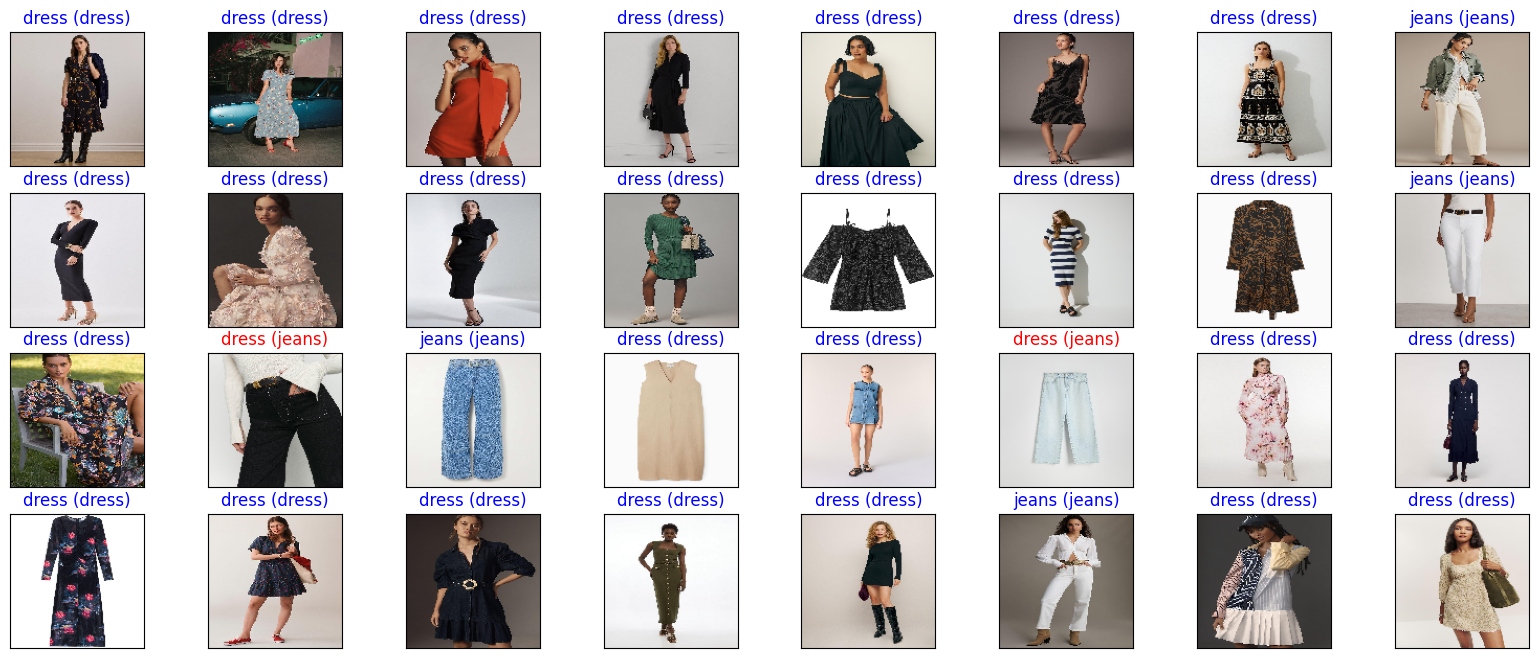

In [23]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
# Get the number of samples in x_test
num_samples = X_test.shape[0]

# Ensure 'size' is less than or equal to the number of samples in x_test
sample_size = min(num_samples, 32)

for i, idx in enumerate(np.random.choice(num_samples, size=sample_size, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [25]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 96.4807%
